# Binary Classification using k-NN Classifier

with __[Wine Quality Data](http://archive.ics.uci.edu/ml/datasets/Wine+Quality])__.

*By:* **Rabindra Nepal**

In [1]:
# Dependencies

import math
import time
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('_classic_test')
%matplotlib inline

# searborn: plotting
import seaborn as sns
from scipy import stats

# warnings suppression
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

# sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import scale

###### 2.

In [2]:
df = pd.read_csv('winequality-white.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


#### 3.

In [4]:
df['quality'] = (df['quality']>5).astype('int8')
df = df.rename(columns={'quality': 'target'})

In [5]:
df.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
1157,7.8,0.300,0.29,16.85,0.054,23.0,135.0,0.99980,3.16,0.38,9.0,1
1610,7.5,0.320,0.49,1.70,0.031,44.0,109.0,0.99060,3.07,0.46,12.5,1
1427,7.4,0.250,0.49,1.10,0.042,35.0,156.0,0.99170,3.13,0.55,11.3,0
342,6.4,0.260,0.42,9.70,0.044,30.0,140.0,0.99620,3.18,0.47,9.1,1
334,5.6,0.260,0.26,5.70,0.031,12.0,80.0,0.99230,3.25,0.38,10.8,0
260,6.9,0.115,0.35,5.40,0.048,36.0,108.0,0.99390,3.32,0.42,10.2,1
3258,7.4,0.190,0.31,14.50,0.045,39.0,193.0,0.99860,3.10,0.50,9.2,1
3384,6.8,0.230,0.30,6.95,0.044,42.0,179.0,0.99460,3.25,0.56,10.6,1
4484,5.8,0.555,0.26,4.50,0.053,17.0,126.0,0.99430,3.24,0.46,9.1,0
3446,7.3,0.340,0.30,9.40,0.057,34.0,178.0,0.99554,3.15,0.44,10.4,1


In [6]:
df.target.value_counts()

1    3258
0    1640
Name: target, dtype: int64

#### Note:

One important point to notice here is that the dataset is not balanced based upon our characterization of 'good' and 'bad' binary classes of the wine quality. Since there are almost double data points for 'good' wine than that for 'bad' wine, we might face some inherent bias towards the 'good' quality wine due to this data imbalance.

For the imbalanced/skewed dataset like this, Precision-Recall curve can be better choice for the performance test than ROC. Therefore, the further feature selection and hyperparameters choices are done based on the performance observed in Precision-Recall curve

#### 4.

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,0.665169
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.471979
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,1.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,1.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,1.000000


No missing values - great -> no data imputation required.

#### 6. Pairplot using seaborn

run time:  503.5269179344177 s


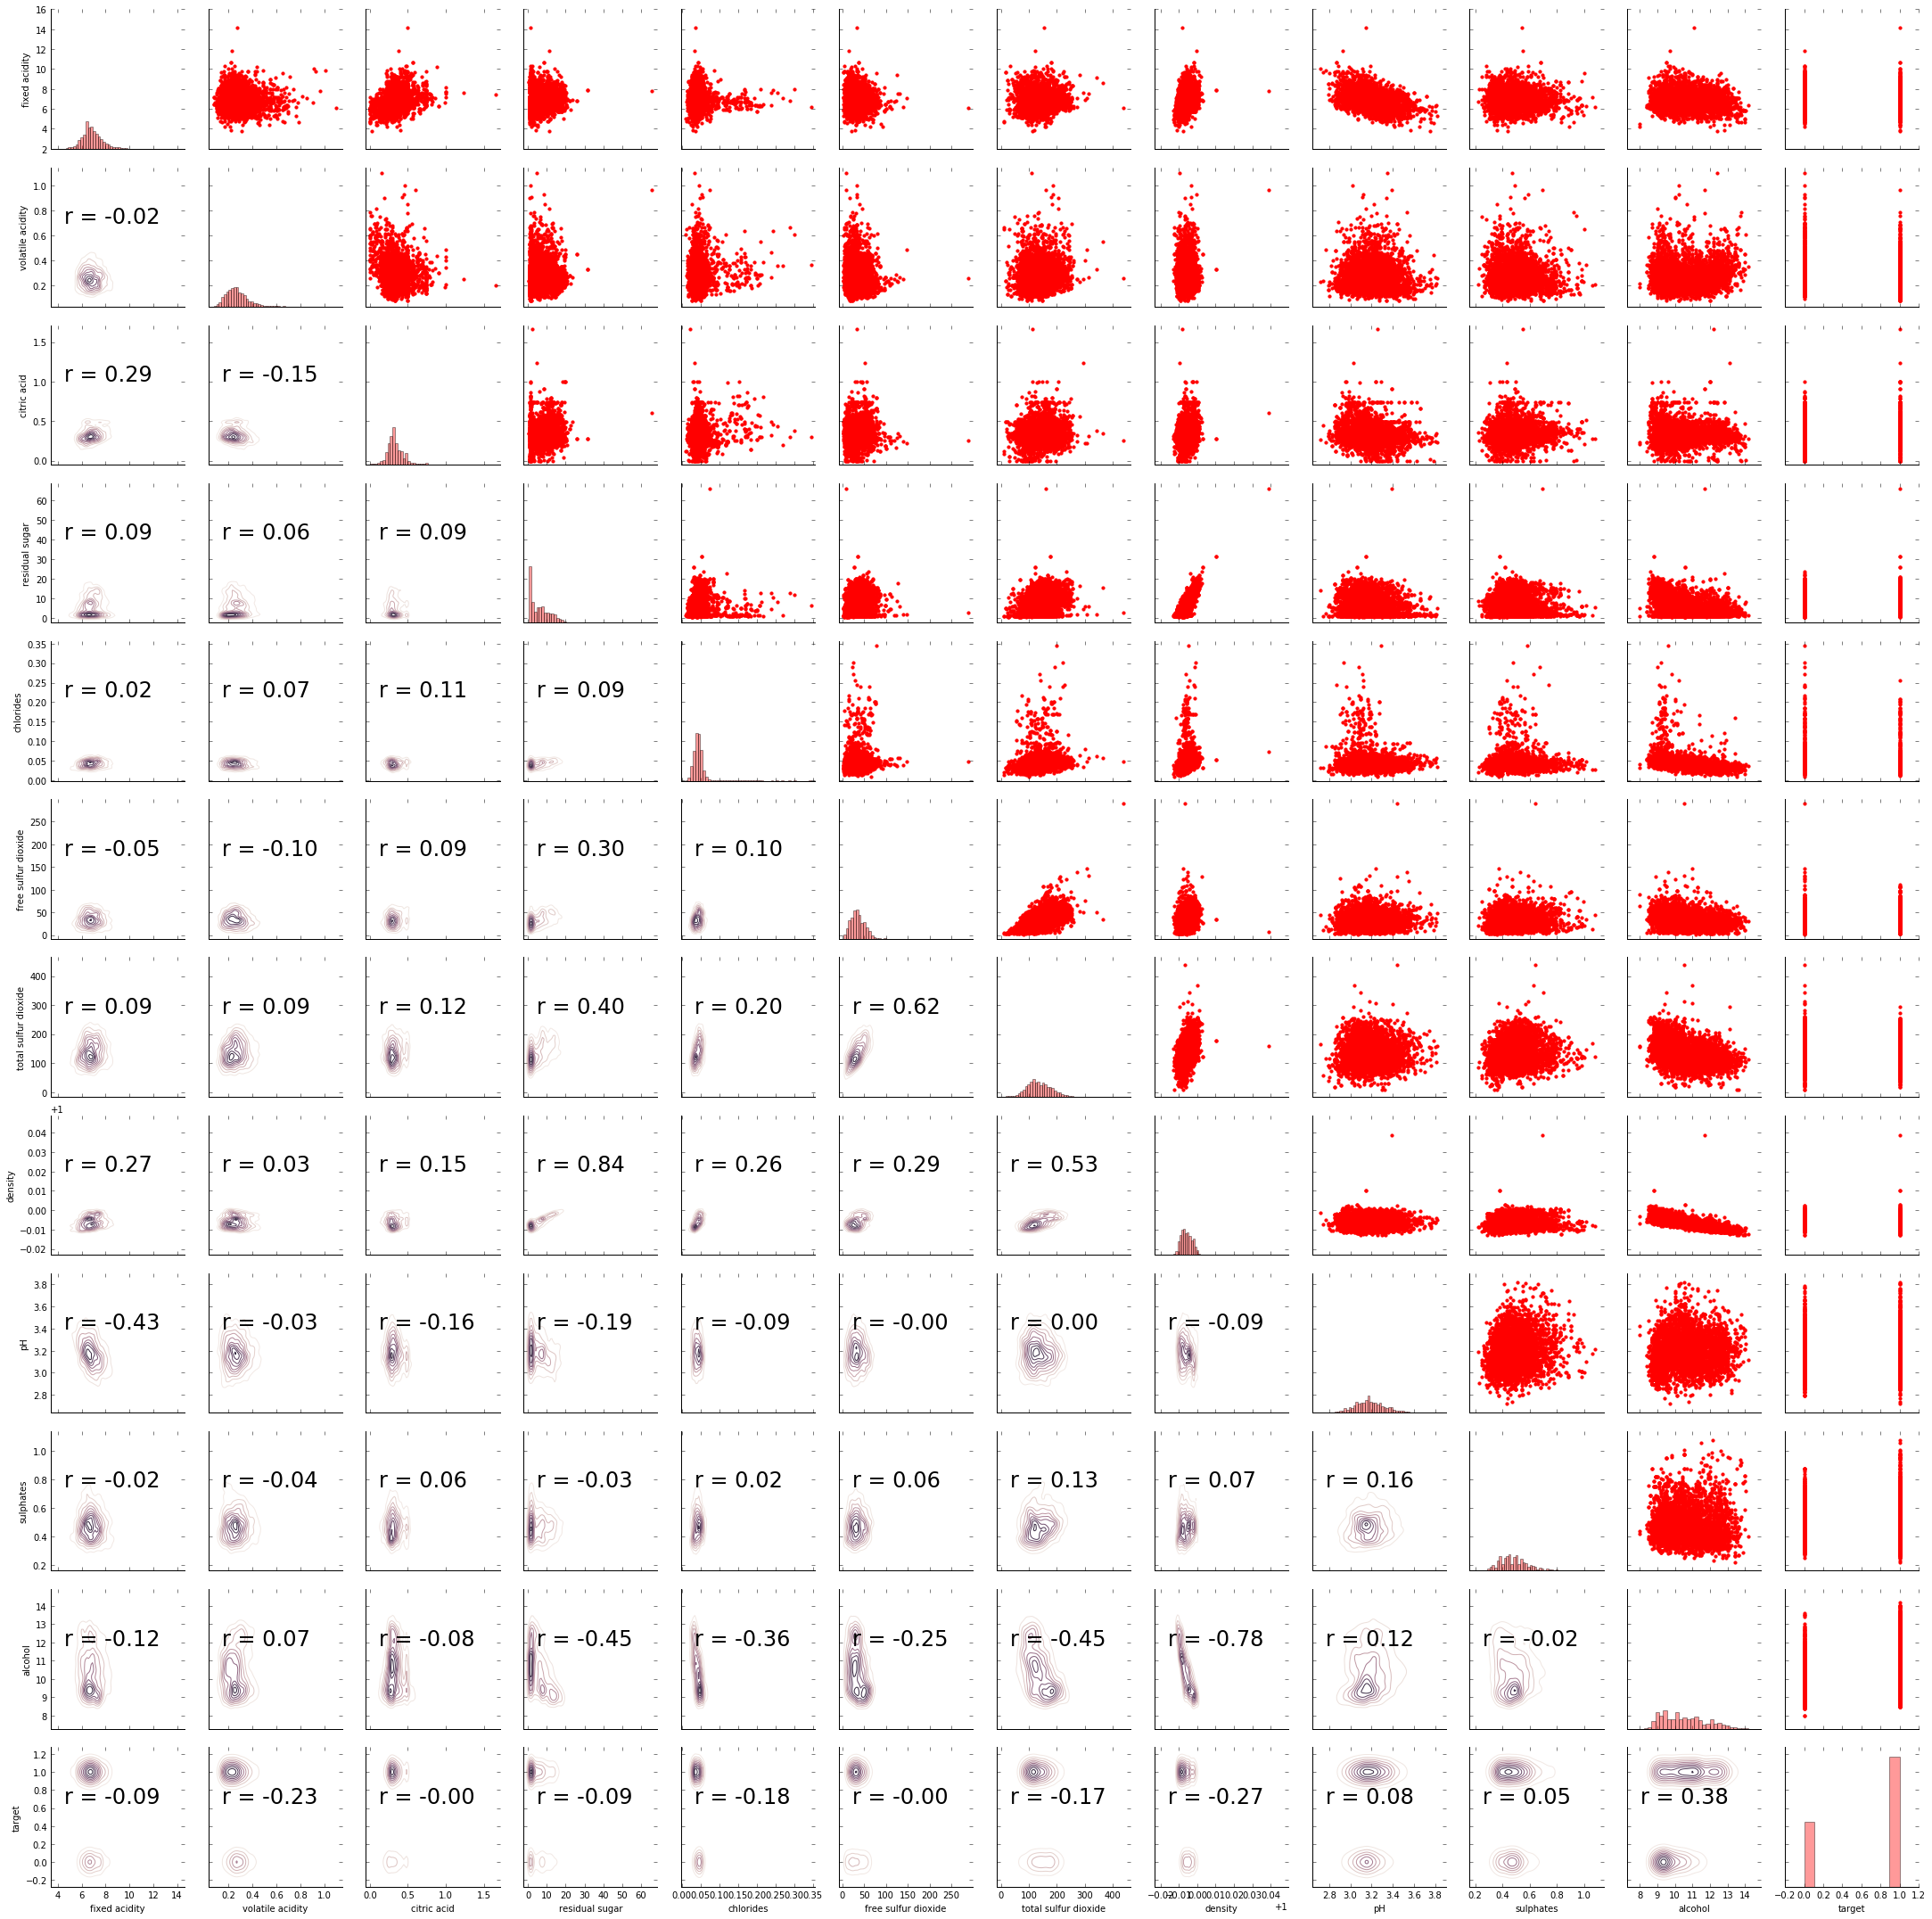

In [8]:
# Warning: It takes many minutes to RUN
# Calculate correlation coefficient

begin = time.time()

def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1, hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(df)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

print('run time: ', time.time() - begin, 's')

#### 7. Drop redundant features

####  Redundant features???
 * 'density' and 'residual sugar'
 * 'free sulfur dioxide' and 'total sulfur dioxide'
 * 'fixed acidity' and 'pH'
 
 *Let us first look into correlation of each of the features on the target before dropping any of them.*

In [9]:
df.corr()['target'].abs().sort_values(ascending=False)

target                  1.000000
alcohol                 0.383280
density                 0.268696
volatile acidity        0.225440
chlorides               0.183939
total sulfur dioxide    0.170924
residual sugar          0.092756
fixed acidity           0.089749
pH                      0.083687
sulphates               0.051858
free sulfur dioxide     0.001278
citric acid             0.000700
Name: target, dtype: float64

The above three pairs of features are not be purely duplicate, let us look into more detail plotting their pair plot separately.

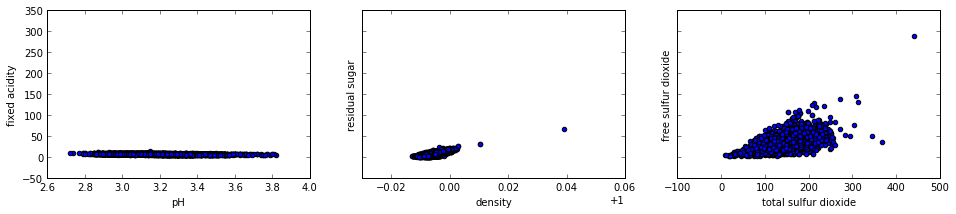

In [10]:
#plt.figure(figsize=(12, 8));
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True);

fig.set_figheight(3)
fig.set_figwidth(16)

ax[0].scatter(df.pH, df['fixed acidity'])
ax[0].set_xlabel('pH')
ax[0].set_ylabel('fixed acidity')
ax[1].scatter(df.density, df['residual sugar'])
ax[1].set_xlabel('density')
ax[1].set_ylabel('residual sugar')
ax[2].scatter(df['total sulfur dioxide'], df['free sulfur dioxide'])
ax[2].set_xlabel('total sulfur dioxide')
ax[2].set_ylabel('free sulfur dioxide')

plt.show()

In [11]:
#df = df.drop(columns=['residual sugar', 'free sulfur dioxide', 'fixed acidity', 'pH', 'density'], inplace=False)
# dropping following two features only
df = df.drop(columns=['fixed acidity', 'residual sugar'], inplace=False)

**Features selection:** I did some experiments with feature selections and dropping some of the relatively unimportant or probably redundant features. At the end, based on the both accuracies and run time complexity, I am dropping two of almost redundant features (due to the presence of their complementary features in the dataset) in the further calculations.

In [12]:
df.head()

,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
0,0.27,0.36,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,0.30,0.34,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,0.28,0.40,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,0.23,0.32,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,0.23,0.32,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [13]:
y = df['target']
X = df.drop(columns=['target'], inplace=False)

#### 8. Training, validation data split

In [14]:
# this also does data shuffling
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2019)

In [15]:
print('Data size:')
print('x_train.shape: %s, x_test.shape %s: ' % (x_train.shape, x_test.shape))

Data size:
x_train.shape: (3918, 9), x_test.shape (980, 9): 


#### 9. Features standardization 

In [16]:
x_train, x_test = scale(x_train), scale(x_test)

#### 10. Cross-Validation 

Using GridSearchCV, we will also carry our the hyper-parameter tuning to figure out the best parameters to create the model that we will work with further.

In [17]:
n_neighbors = [1, 3, 5, 7, 9, 15, 21, 23, 33, 35, 37]
p =  [1, 2, 10, 100]
weights = ["uniform", "distance"]
param_grid = {'n_neighbors': n_neighbors, 'p': p, 'weights': weights}

In [18]:
# Hyperparameters tuning

begin = time.time()

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid=param_grid, scoring='f1', cv=10)
knn_cv.fit(x_train, y_train)

print('time taken: ', (time.time() - begin) // 60, 'mins')

time taken:  29.0 mins


In [19]:
# Best hyperparamters
best_params = knn_cv.best_params_
best_params

{'n_neighbors': 33, 'p': 2, 'weights': 'distance'}

In [20]:
knn_cv.best_score_

0.8777832463317868

#### 11. k-NN with best hyperparameters

Now, I will work ahead with a k-NN model using the best parameters obtained above by hyper-parameters tuning with GridSearhCV.

In [59]:
knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], p=best_params['p'], weights=best_params['weights'])

In [60]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=33, p=2,
           weights='distance')

#### 12. Model Evaluation

In [61]:
cross_val_score(knn, x_train, y_train)

array([0.79112471, 0.8093415 , 0.8091954 ])

#### 13. Performance on train data



In [62]:
y_train_pred = knn.predict(x_train)

In [63]:
precision_score(y_train, y_train_pred)

1.0

In [64]:
recall_score(y_train, y_train_pred)

1.0

In [65]:
f1_score(y_train, y_train_pred)

1.0

In [66]:
confusion_matrix(y_train, y_train_pred)

array([[1318,    0],
       [   0, 2600]], dtype=int64)

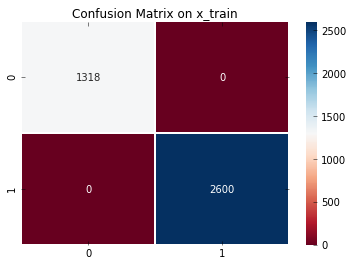

In [67]:
# Confusion matrix: illustration with heatmap
plt.figure(figsize=(6, 4))
conf_matrix = confusion_matrix(y_train, y_train_pred)
sns.heatmap(conf_matrix, annot=True, cmap='RdBu', vmin=0, vmax=2600, linewidths=0.5, fmt='.5g');
plt.title('Confusion Matrix on x_train');

#### 14. ROC curve

In [68]:
fpr, tpr, threholds = roc_curve(y_train, y_train_pred)

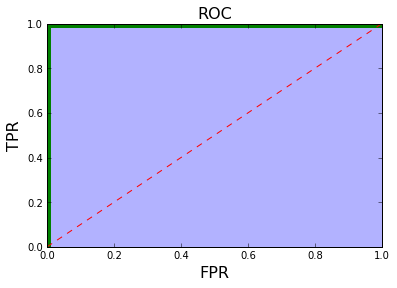

In [69]:
plt.fill_between(fpr, tpr, y2=0, alpha=0.3, color='b')

plt.plot(fpr, tpr, linewidth=8, c='green')
plt.plot([0, 1], [0, 1], c='r', linestyle='--');

plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.title('ROC', fontsize=16);

Using knn.predict_probab(): In this case it will appear same: but when we have more than two unique probablities in the predicted labels, we can get many more points than just 3 in the ROC curve and the curve becomes more smooth, see the ROC curve for prediction on test data later.

In [70]:
y_train_score = knn.predict_proba(x_train)[:,1]

In [71]:
fpr, tpr, threholds = roc_curve(y_train, y_train_score)

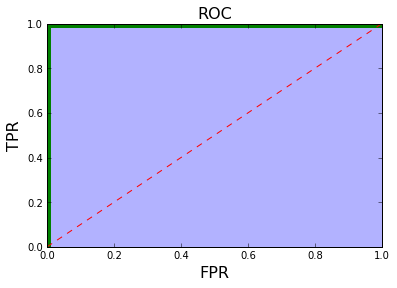

In [73]:
plt.fill_between(fpr, tpr, y2=0, alpha=0.3, color='b')

plt.plot(fpr, tpr, linewidth=8, c='green')
plt.plot([0, 1], [0, 1], c='r', linestyle='--');

plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.title('ROC', fontsize=16);

#### 15. AUC

Area under the ROC curve

In [74]:
roc_auc_score(y_train, y_train_pred)

1.0

#### 16. Precision-recall curve

In [75]:
from sklearn.metrics import precision_recall_curve

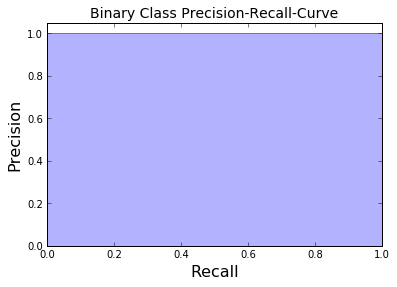

In [76]:
# precision-recall curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature

precision, recall, thresholds = precision_recall_curve(y_train, y_train_score)
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.3,
         where='post')
plt.fill_between(recall, precision, alpha=0.3, color='b', **step_kwargs)

plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Binary Class Precision-Recall-Curve', fontsize=14);

#### 17.  Performance on Test Data

In [77]:
y_test_pred = knn.predict(x_test)

In [78]:
# a. Precision

print('precision: ', precision_score(y_test, y_test_pred))

precision:  0.8090659340659341


In [79]:
# b. Recall 

print('Recall score: ', recall_score(y_test, y_test_pred))

Recall score:  0.8951367781155015


In [80]:
# c. F1-score

print('F1-score: ', f1_score(y_test, y_test_pred))

F1-score:  0.8499278499278499


In [81]:
# d. Confusion matrix

print('Confusion matrix is: \n', confusion_matrix(y_test, y_test_pred))

Confusion matrix is: 
 [[183 139]
 [ 69 589]]


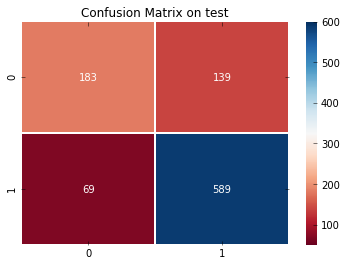

In [82]:
# confusion matrix: illustrated with heatmap
plt.figure(figsize=(6, 4))
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, cmap='RdBu', vmin=50, vmax=600, linewidths=0.5, fmt='.5g');
plt.title('Confusion Matrix on test');

In [83]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.73      0.57      0.64       322
           1       0.81      0.90      0.85       658

   micro avg       0.79      0.79      0.79       980
   macro avg       0.77      0.73      0.74       980
weighted avg       0.78      0.79      0.78       980



In [84]:
# e. Accuracy score

correct = 0
for y, y_ in zip(y_test, y_test_pred):
    if y == y_:
        correct += 1
print('Accuracy score: ', correct/len(y_test))

Accuracy score:  0.7877551020408163


In [85]:
from sklearn.metrics import accuracy_score
print('Accuracy score: ', accuracy_score(y_test, y_test_pred))

Accuracy score:  0.7877551020408163


### 18. Prediction on Test Data

In [86]:
y_test_score = knn.predict_proba(x_test)[:,1]

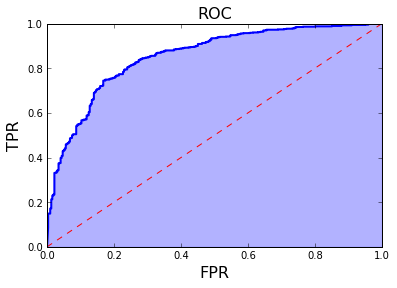

In [88]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_score)

plt.fill_between(fpr, tpr, y2=0, alpha=0.3, color='b', **step_kwargs)

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], c='r', linestyle='--') # Baseline line

plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.title('ROC', fontsize=16);

In [89]:
roc_auc_score(y_test, y_test_score)

0.8534638184598539

In [92]:
confusion_matrix(y_test, y_test_pred)

array([[183, 139],
       [ 69, 589]], dtype=int64)

In [93]:
# precision-recall curve
def plot_precision_recall_curve():

    precision, recall, thresholds = precision_recall_curve(y_test, y_test_score)
    step_kwargs = ({'step': 'post'} if 'step' in signature(plt.fill_between).parameters else {})
    plt.step(recall, precision, color='r', alpha=0.5, where='post', linewidth=2)
    plt.fill_between(recall, precision, alpha=0.3, color='b', **step_kwargs)

    plt.xlabel('Recall', fontsize=16)
    plt.ylabel('Precision', fontsize=16)
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Binary Class Precision-Recall-Curve', fontsize=14);
    plt.show()

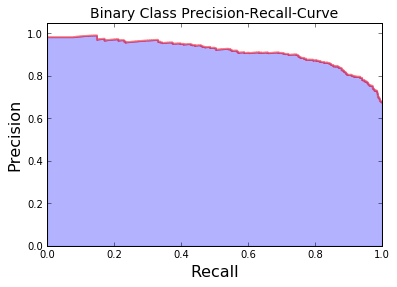

In [94]:
plot_precision_recall_curve()

In [95]:
from sklearn.metrics import precision_recall_fscore_support

In [96]:
# precision, recall, f1-score for each of the classes 0 and 1

precision_recall_fscore_support(y_test, y_test_pred, warn_for=('precision', 'recall', 'f-score'))

(array([0.72619048, 0.80906593]),
 array([0.56832298, 0.89513678]),
 array([0.63763066, 0.84992785]),
 array([322, 658], dtype=int64))